In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [5]:
#import file
data = pd.read_csv('All_data.csv')

In [6]:
y = data['Norm_D']
selected_feature=['pm10','pm25','co','no2','o3','Cday','rgdp']
X = data[selected_feature]

In [7]:
#Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Implement Random forest
regressor = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


accuracy = regressor.score(X_train, y_train)
accuracy_test = regressor.score(X_test, y_test)

print('Accuracy:', accuracy)
print('Accuracy Test:', accuracy_test)

Accuracy: 0.9989810691442935
Accuracy Test: 0.9740669525858289


In [8]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.009107989705657921
MSE: 0.001071840502847149
R2: 0.9740669525858289


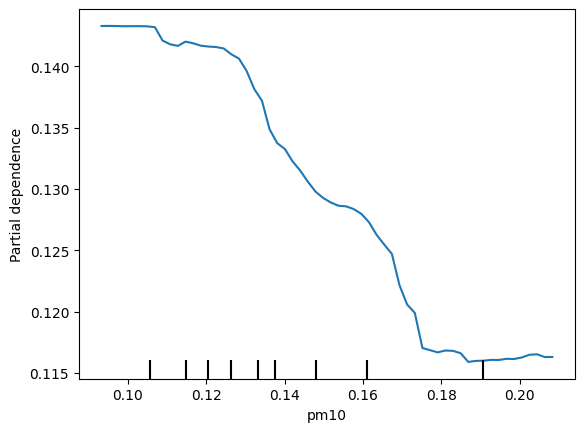

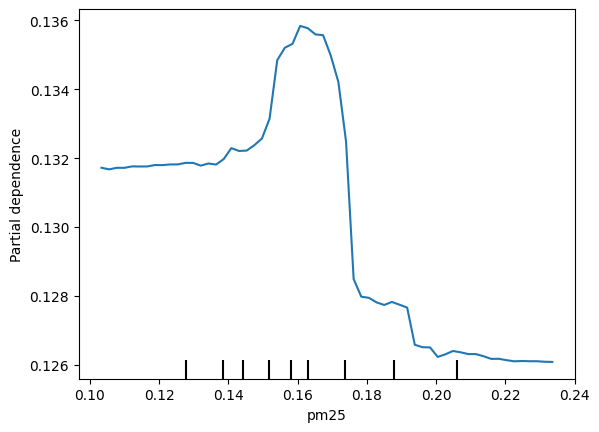

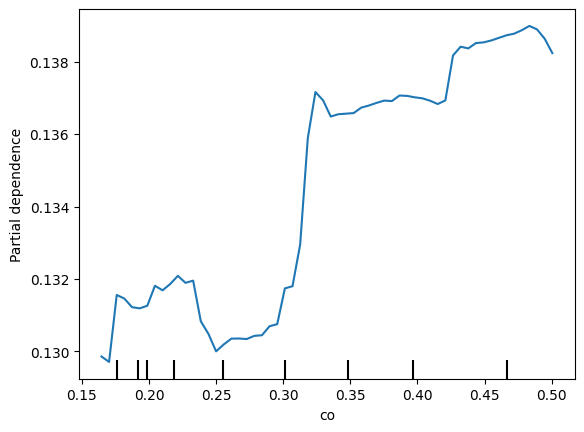

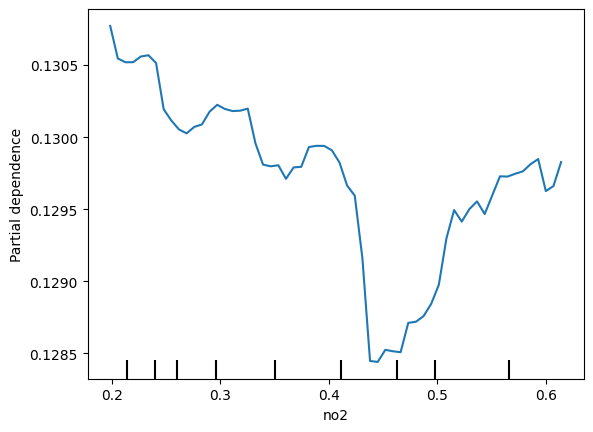

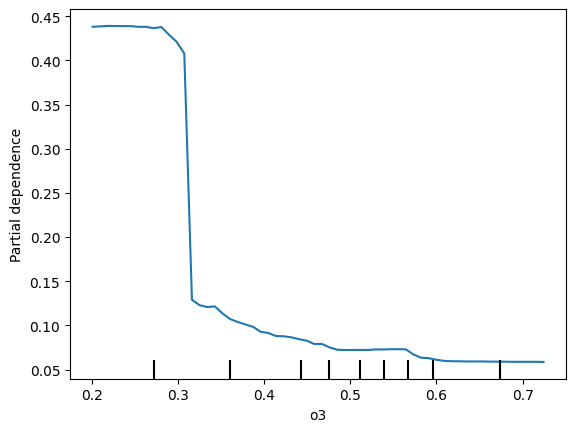

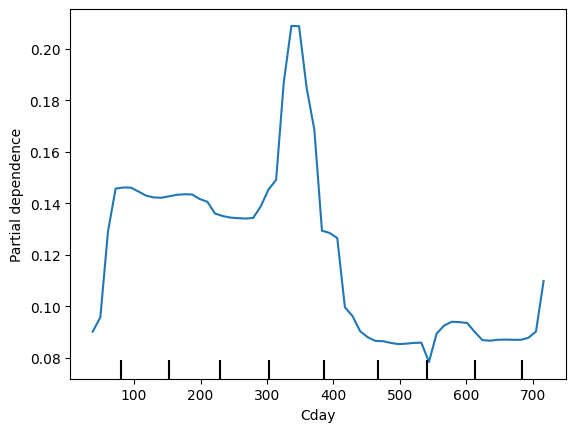

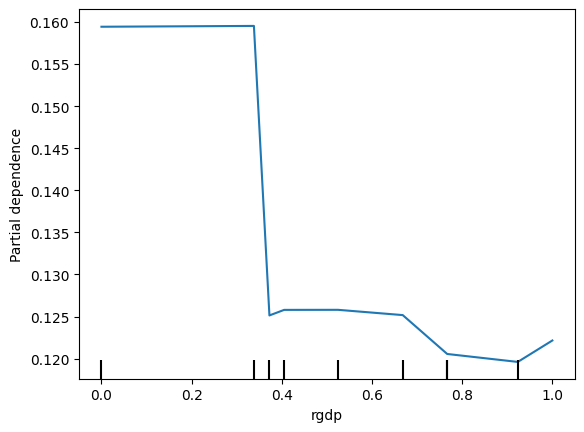

In [9]:
#Partial depence plot, type 2
for i in X:
      PartialDependenceDisplay.from_estimator(regressor, X_train, [(i)] , grid_resolution=60 )

     Observed Deaths  Predicted Deaths
409         0.092002          0.089364
97          0.150422          0.146645
281         0.061856          0.058993
497         0.011090          0.014463
440         0.032802          0.032955
..               ...               ...
213         0.095127          0.095380
501         0.010778          0.011346
356         0.711496          0.358916
90          0.150578          0.149549
360         0.631990          0.677593

[152 rows x 2 columns]


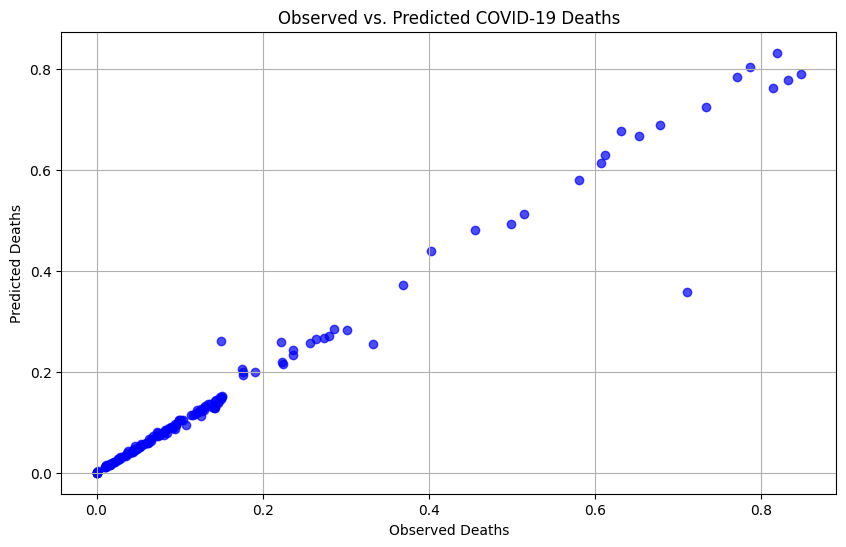

Mean Squared Error: 0.001071840502847149
pm10: 0.03301330289492301
pm25: 0.008608808720304083
co: 0.009509468433399561
no2: 0.008384478120234072
o3: 0.6112467271837753
Cday: 0.31020032133792813
rgdp: 0.019036893309435768


In [10]:
results_df = pd.DataFrame({'Observed Deaths': y_test, 'Predicted Deaths': y_pred})
print(results_df)

# Plot predicted vs. observed deaths
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Observed Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Observed vs. Predicted COVID-19 Deaths')
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
feature_importance = regressor.feature_importances_
for i, feature in enumerate(X):
    print(f"{feature}: {feature_importance[i]}")

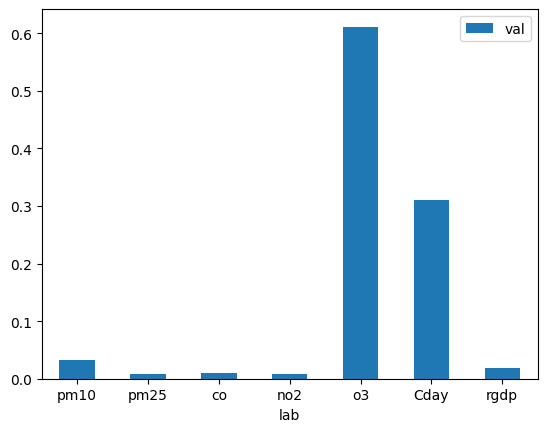

In [11]:
#Feature importance
df = pd.DataFrame({'lab':selected_feature, 'val':list(feature_importance)})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [12]:
#permutation importance
model = RandomForestRegressor()

# آموزش مدل
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='neg_mean_squared_error', n_repeats=10, random_state=0)

# نمایش اهمیت هر یک از متغیرها
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f'Variable {X.columns[i]} importance: {imp}')

Variable pm10 importance: 0.000446546393364062
Variable pm25 importance: 0.00016627927742067814
Variable co importance: 0.00011495520599563652
Variable no2 importance: 0.00016607150566866433
Variable o3 importance: 0.033417296563948116
Variable Cday importance: 0.015740724956587765
Variable rgdp importance: 0.001140793879366234


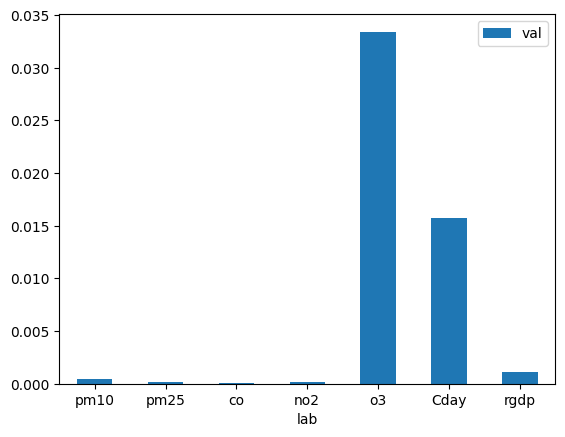

In [13]:
df = pd.DataFrame({'lab':selected_feature, 'val':list(importance)})
ax = df.plot.bar(x='lab', y='val', rot=0)

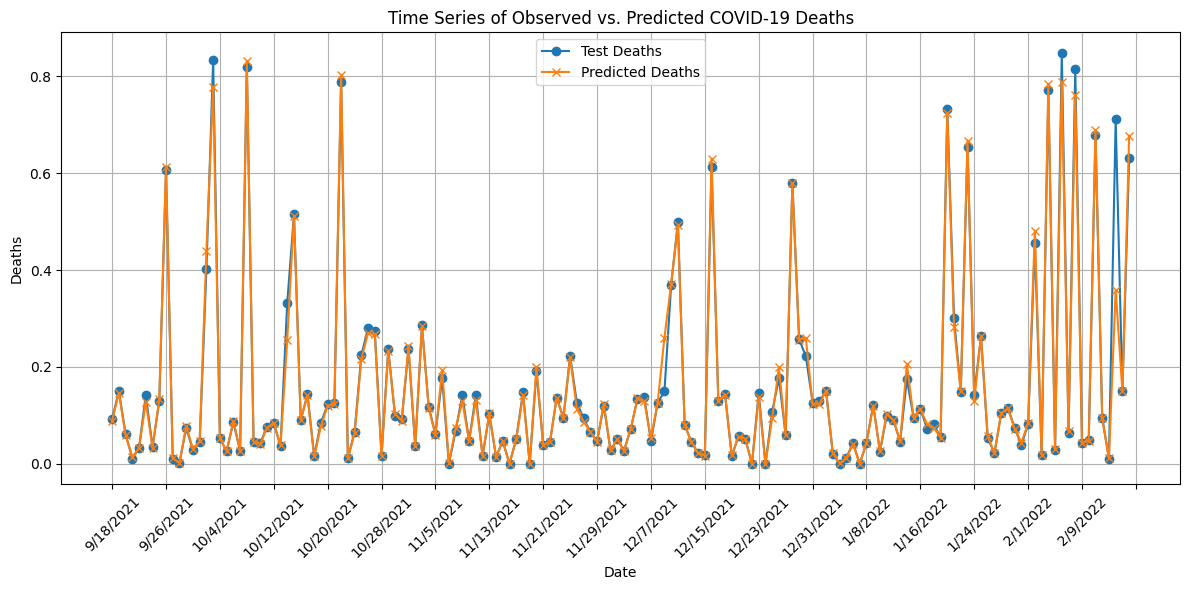

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'][605:], y_test, label='Test Deaths', marker='o')
plt.plot(data['date'][605:], y_pred, label='Predicted Deaths', marker='x')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Time Series of Observed vs. Predicted COVID-19 Deaths')
plt.xticks(rotation=45)
plt.xticks([8 * i for i in range(20)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# ساخت مدل رندوم فارست
model = RandomForestRegressor()

# آموزش مدل
model.fit(X, y)
# محاسبه اهمیت ویژگی‌ها
importance = model.feature_importances_

# نمایش اهمیت ویژگی‌ها
for i,v in enumerate(importance):
    print('ویژگی: %s, اهمیت: %.5f' % (X.iloc[:,i],v))

ویژگی: 0      0.144244
1      0.148867
2      0.151410
3      0.154184
4      0.155340
         ...   
752    0.115118
753    0.116043
754    0.119048
755    0.119510
756    0.119741
Name: pm10, Length: 757, dtype: float64, اهمیت: 0.01557
ویژگی: 0      0.154875
1      0.154875
2      0.154875
3      0.155175
4      0.153823
         ...   
752    0.099895
753    0.099594
754    0.097041
755    0.084122
756    0.085474
Name: pm25, Length: 757, dtype: float64, اهمیت: 0.00957
ویژگی: 0      0.396178
1      0.399093
2      0.391642
3      0.391642
4      0.383868
         ...   
752    0.095886
753    0.087787
754    0.073534
755    0.053126
756    0.043408
Name: co, Length: 757, dtype: float64, اهمیت: 0.01038
ویژگی: 0      0.542624
1      0.545340
2      0.540879
3      0.540006
4      0.542721
         ...   
752    0.138687
753    0.129667
754    0.105324
755    0.078363
756    0.063912
Name: no2, Length: 757, dtype: float64, اهمیت: 0.00629
ویژگی: 0      0.349120
1      0.353390
2      0

In [16]:
df = pd.read_csv('All_data.csv')
df.iloc[:, 13:19].corr()

,CDATE,Norm_Death,Norm_D,Norm_PM10,Norm_PM25,Norm_O3
CDATE,1.000000,-0.024810,-0.002739,0.042217,0.128428,0.003286
Norm_Death,-0.024810,1.000000,0.867569,0.010661,0.077135,-0.412662
Norm_D,-0.002739,0.867569,1.000000,0.076388,0.138392,-0.454126
Norm_PM10,0.042217,0.010661,0.076388,1.000000,0.338038,-0.135561
Norm_PM25,0.128428,0.077135,0.138392,0.338038,1.000000,-0.196446
Norm_O3,0.003286,-0.412662,-0.454126,-0.135561,-0.196446,1.000000


<Axes: >

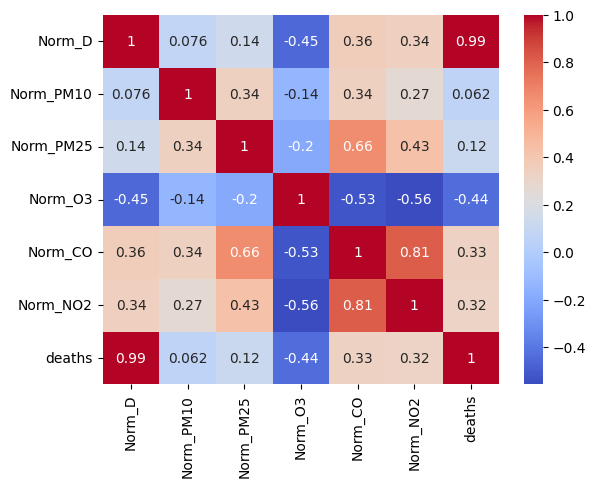

In [17]:
%matplotlib inline
d = pd.read_csv('All_data.csv')
sns.heatmap(d.iloc[:, 15:22].corr(),annot=True,cmap='coolwarm')

<Axes: >

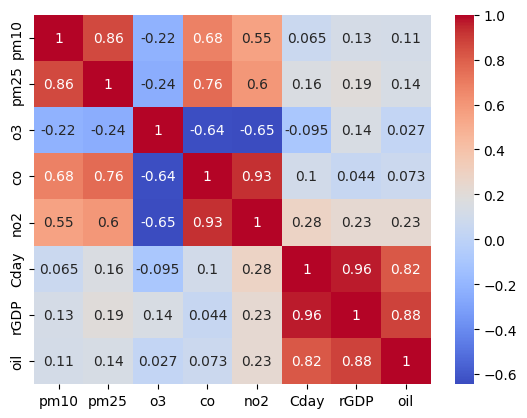

In [18]:
%matplotlib inline
p = pd.read_csv('All_data.csv')
sns.heatmap(p.iloc[:, 22:31].corr(),annot=True,cmap='coolwarm')

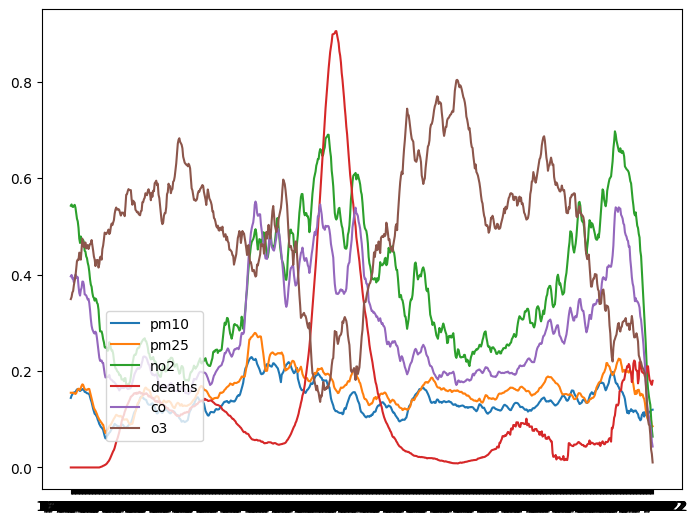

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
d = pd.read_csv('All_data.csv')
x=d['date']
y1=d['pm10']
y2=d['pm25']
y3=d['no2']
y5=d['deaths']
y4=d['co']
y6=d['o3']



ax = fig.add_axes([0,0,1,1])
ax.plot(x,y1,label='pm10')
ax.plot(x,y2,label='pm25')
ax.plot(x,y3,label='no2')
ax.plot(x,y5,label='deaths')
ax.plot(x,y4,label='co')
ax.plot(x,y6,label='o3')

ax.legend(loc=(0.1,0.1))

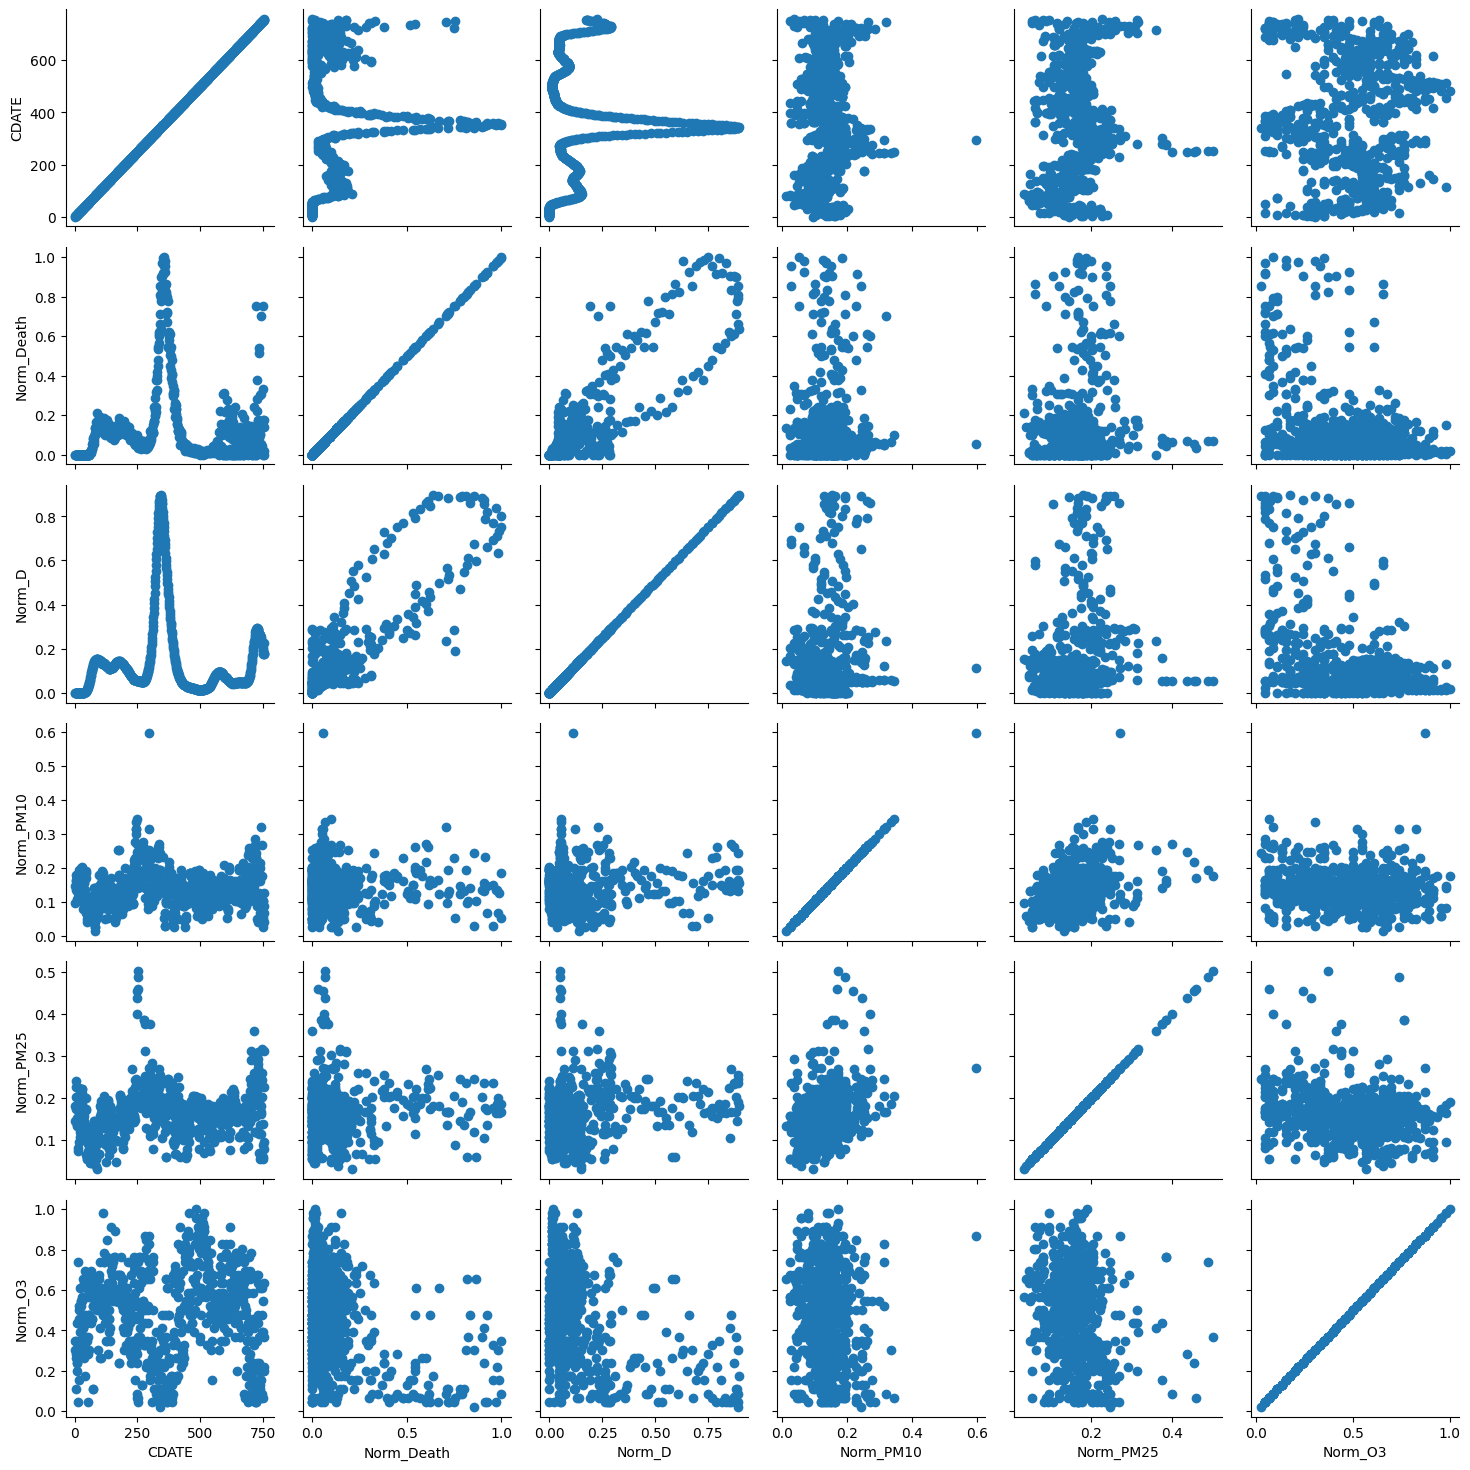

In [20]:
info = pd.read_csv('All_data.csv')
g = sns.PairGrid(info.iloc[:, 13:19])
g.map(plt.scatter)

Text(0.5, 0, ' day')

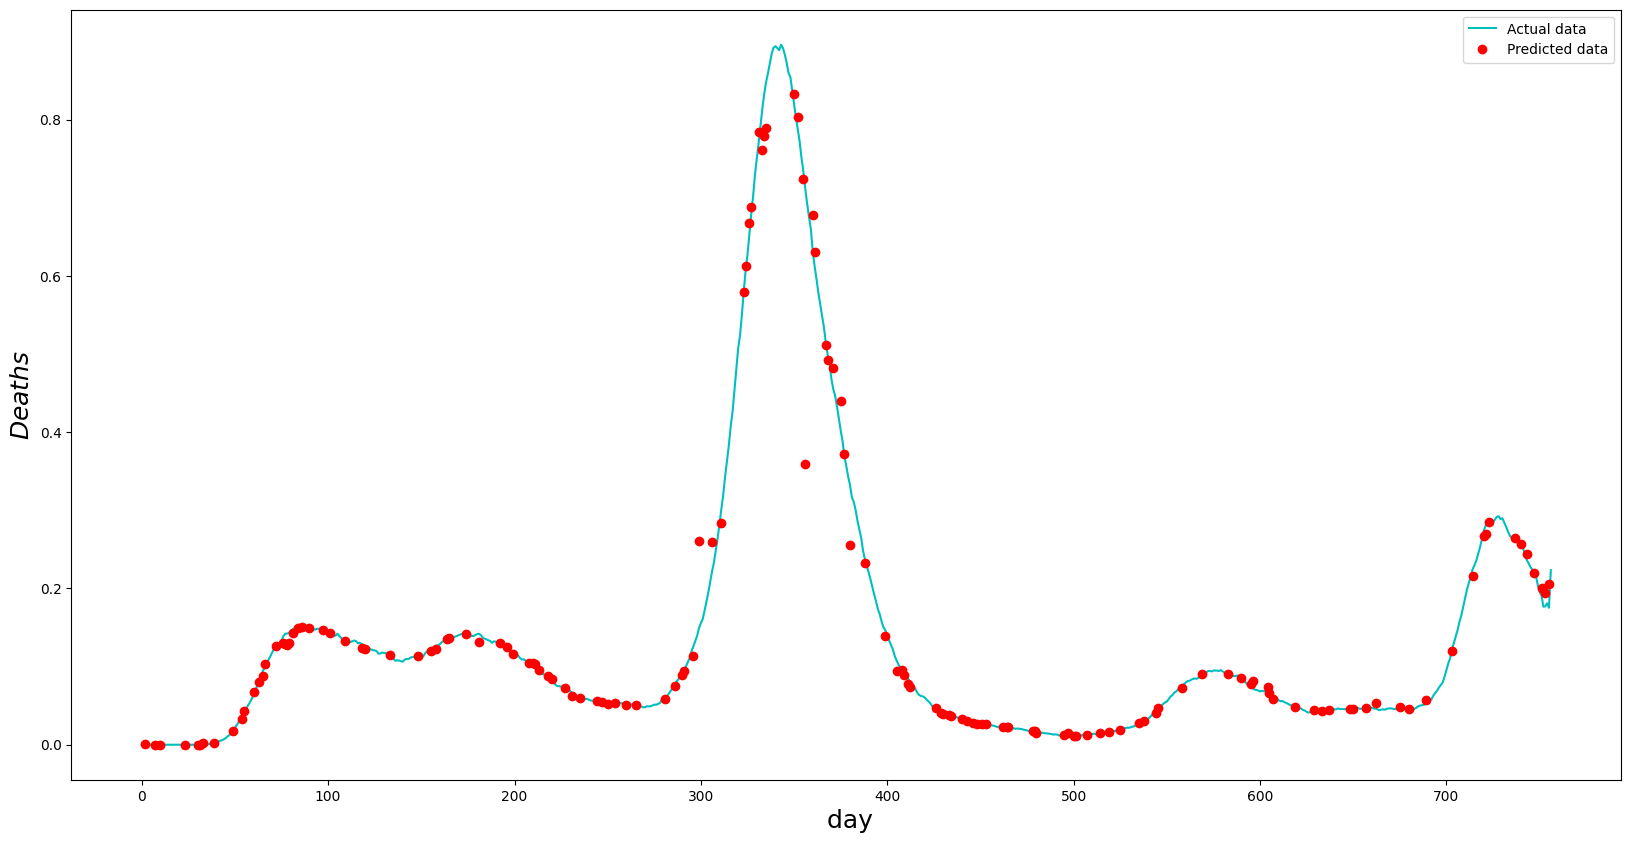

In [21]:
#plot prediction and real data
plt.figure (figsize= (20,10) )
plt.plot(y.index , y , 'c-')
plt.plot(X_test.index  , y_pred , 'ro')
plt.legend(['Actual data'   , 'Predicted data'] )
plt.ylabel("$Deaths  $" , fontsize=18)
plt.xlabel(' day', fontsize=18)

In [22]:
#cross_validations
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [40]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=50),
param_grid=param_grid,cv=KFold(n_splits=50, shuffle=True, random_state=50))
grid_search.fit(X_train, y_train)
#Cross validation results
grid_search.cv_results_

{'mean_fit_time': array([0.17514338]),
 'std_fit_time': array([0.03593653]),
 'mean_score_time': array([0.00468378]),
 'std_score_time': array([0.00131515]),
 'param_n_estimators': masked_array(data=[40],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 40}],
 'split0_test_score': array([0.99075727]),
 'split1_test_score': array([0.99843742]),
 'split2_test_score': array([0.99570103]),
 'split3_test_score': array([0.98700078]),
 'split4_test_score': array([0.96946192]),
 'split5_test_score': array([0.99960976]),
 'split6_test_score': array([0.99510473]),
 'split7_test_score': array([0.99658685]),
 'split8_test_score': array([0.99601896]),
 'split9_test_score': array([0.99867373]),
 'split10_test_score': array([0.99923057]),
 'split11_test_score': array([0.99854753]),
 'split12_test_score': array([0.99793735]),
 'split13_test_score': array([0.9700488]),
 'split14_test_score': array([0.99851168]),
 'split15_test_score': array([0